# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_count = 0
cities_list = []
lon = []
lat = []
max_temp = []
hum = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    result = requests.get(url)
    json = result.json()
    try:
        lon.append(json['coord']['lon'])
        lat.append(json['coord']['lat'])
        max_temp.append(json['main']['temp_max'])
        hum.append(json['main']['humidity'])
        cloudiness.append(json['clouds']['all'])
        wind_speed.append(json['wind']['speed'])
        country.append(json['sys']['country'])
        date.append(json['dt'])
        cities_list.append(city)
        city_count += 1
        print(f"Processing Record {city_count} | {city}")
    except:
        pass

Processing Record 1 | the valley
Processing Record 2 | coihaique
Processing Record 3 | cape town
Processing Record 4 | hermanus
Processing Record 5 | thompson
Processing Record 6 | creel
Processing Record 7 | dhidhdhoo
Processing Record 8 | provideniya
Processing Record 9 | puerto ayora
Processing Record 10 | rawah
Processing Record 11 | kapaa
Processing Record 12 | albany
Processing Record 13 | punta arenas
Processing Record 14 | ahipara
Processing Record 15 | saint-pierre
Processing Record 16 | mahebourg
Processing Record 17 | hofn
Processing Record 18 | sao filipe
Processing Record 19 | tilichiki
Processing Record 20 | georgetown
Processing Record 21 | whitehorse
Processing Record 22 | vaini
Processing Record 23 | ushuaia
Processing Record 24 | hilo
Processing Record 25 | saint george
Processing Record 26 | samarai
Processing Record 27 | zima
Processing Record 28 | avarua
Processing Record 29 | mar del plata
Processing Record 30 | qaanaaq
Processing Record 31 | atuona
Processing Rec

Processing Record 253 | tiarei
Processing Record 254 | verkhovyna
Processing Record 255 | cherskiy
Processing Record 256 | chapais
Processing Record 257 | kahului
Processing Record 258 | denpasar
Processing Record 259 | dubai
Processing Record 260 | zonguldak
Processing Record 261 | rondonopolis
Processing Record 262 | wahiawa
Processing Record 263 | te anau
Processing Record 264 | kabakovo
Processing Record 265 | raudeberg
Processing Record 266 | central point
Processing Record 267 | polovinnoye
Processing Record 268 | kosonsoy
Processing Record 269 | ukiah
Processing Record 270 | doka
Processing Record 271 | nemuro
Processing Record 272 | san fernando
Processing Record 273 | state college
Processing Record 274 | hobyo
Processing Record 275 | broome
Processing Record 276 | khasan
Processing Record 277 | vao
Processing Record 278 | zhigansk
Processing Record 279 | vila franca do campo
Processing Record 280 | ribeira grande
Processing Record 281 | asau
Processing Record 282 | manjacaze


Processing Record 499 | yerbogachen
Processing Record 500 | oriximina
Processing Record 501 | san andres
Processing Record 502 | hermosillo
Processing Record 503 | matagami
Processing Record 504 | camacha
Processing Record 505 | cayenne
Processing Record 506 | goderich
Processing Record 507 | sandwick
Processing Record 508 | kassala
Processing Record 509 | port-gentil
Processing Record 510 | umm kaddadah
Processing Record 511 | bud
Processing Record 512 | glinka
Processing Record 513 | ciudad bolivar
Processing Record 514 | salur
Processing Record 515 | poum
Processing Record 516 | labytnangi
Processing Record 517 | south river
Processing Record 518 | nguru
Processing Record 519 | belaya kalitva
Processing Record 520 | cabedelo
Processing Record 521 | dogondoutchi
Processing Record 522 | salinopolis
Processing Record 523 | gazanjyk
Processing Record 524 | kharar
Processing Record 525 | champerico
Processing Record 526 | kieta
Processing Record 527 | nioro
Processing Record 528 | peace 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df = pd.DataFrame({
    "City": cities_list,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

city_data_df.to_csv(r'city_data.csv', index = False)

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,the valley,18.22,-63.06,87.80,58,20,17.22,AI,1595444535
1,coihaique,-45.58,-72.07,33.80,74,75,4.70,CL,1595445069
2,cape town,-33.93,18.42,57.00,93,0,8.05,ZA,1595444767
3,hermanus,-34.42,19.23,54.00,94,0,5.37,ZA,1595445072
4,thompson,55.74,-97.86,78.80,47,75,9.17,CA,1595445066
...,...,...,...,...,...,...,...,...,...
533,ushtobe,45.25,77.98,72.50,45,0,8.72,KZ,1595445388
534,san giovanni rotondo,41.70,15.72,84.20,45,5,10.29,IT,1595445388
535,shirokiy,49.76,129.52,61.34,86,100,4.38,RU,1595445388
536,leirvik,59.78,5.50,60.01,69,25,1.99,NO,1595445388


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
hum_filter = city_data_df['Humidity'] > 100
hum_outliers = city_data_df[hum_filter]
hum_outliers

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.drop(hum_outliers.index, inplace = False) 

clean_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,the valley,18.22,-63.06,87.80,58,20,17.22,AI,1595444535
1,coihaique,-45.58,-72.07,33.80,74,75,4.70,CL,1595445069
2,cape town,-33.93,18.42,57.00,93,0,8.05,ZA,1595444767
3,hermanus,-34.42,19.23,54.00,94,0,5.37,ZA,1595445072
4,thompson,55.74,-97.86,78.80,47,75,9.17,CA,1595445066
...,...,...,...,...,...,...,...,...,...
533,ushtobe,45.25,77.98,72.50,45,0,8.72,KZ,1595445388
534,san giovanni rotondo,41.70,15.72,84.20,45,5,10.29,IT,1595445388
535,shirokiy,49.76,129.52,61.34,86,100,4.38,RU,1595445388
536,leirvik,59.78,5.50,60.01,69,25,1.99,NO,1595445388


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data_df.to_csv(r'clean_city_data.csv', index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

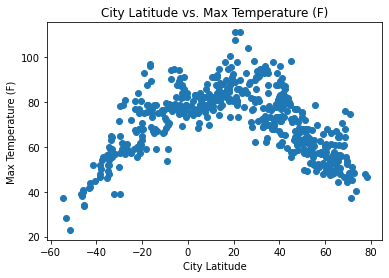

In [18]:
plt.scatter(lat, max_temp)
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity %')

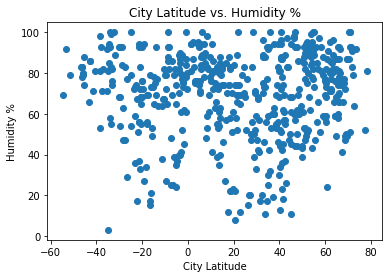

In [19]:
plt.scatter(lat, hum)
plt.title("City Latitude vs. Humidity %")
plt.xlabel("City Latitude")
plt.ylabel("Humidity %")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

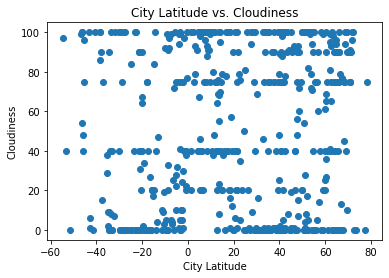

In [20]:
plt.scatter(lat, cloudiness)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

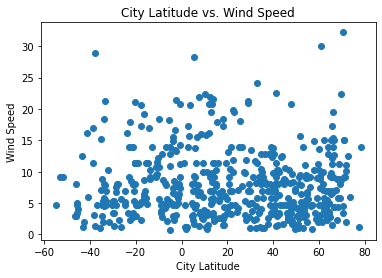

In [21]:
plt.scatter(lat, wind_speed)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [8]:
# OPTIONAL: Create a function to create Linear Regression plots

In [24]:
# Create Northern and Southern Hemisphere DataFrames
nh_filter = clean_city_data_df['Lat'] > 0
sh_filter = clean_city_data_df['Lat'] < 0
nh_df = clean_city_data_df[nh_filter]
sh_df = clean_city_data_df[sh_filter]
nh_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,the valley,18.22,-63.06,87.80,58,20,17.22,AI,1595444535
4,thompson,55.74,-97.86,78.80,47,75,9.17,CA,1595445066
5,creel,27.75,-107.63,70.97,47,100,5.28,MX,1595445308
6,dhidhdhoo,6.88,73.10,82.38,78,100,15.52,MV,1595445308
7,provideniya,64.38,-173.30,53.31,59,0,5.08,RU,1595444902
...,...,...,...,...,...,...,...,...,...
532,tupik,54.43,119.93,57.70,78,100,3.04,RU,1595445387
533,ushtobe,45.25,77.98,72.50,45,0,8.72,KZ,1595445388
534,san giovanni rotondo,41.70,15.72,84.20,45,5,10.29,IT,1595445388
535,shirokiy,49.76,129.52,61.34,86,100,4.38,RU,1595445388


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5646627654874734


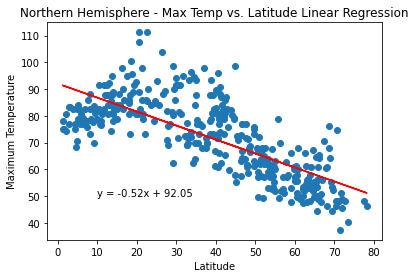

In [60]:
val2 = nh_df['Max Temp']
val1 = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(10, 50))
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6927258131241824


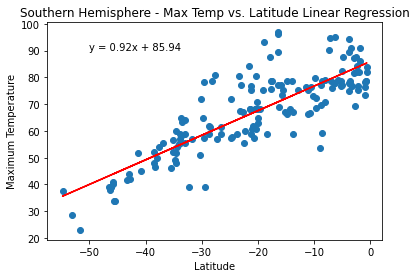

In [63]:
val2 = sh_df['Max Temp']
val1 = sh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(-50, 90))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004617936804042619


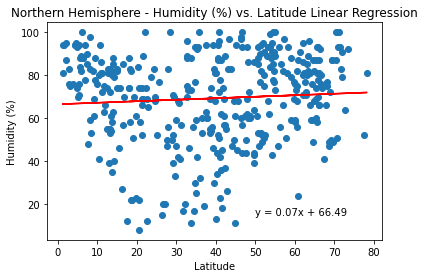

In [65]:
val2 = nh_df['Humidity']
val1 = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(50, 15))
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.042950042999039914


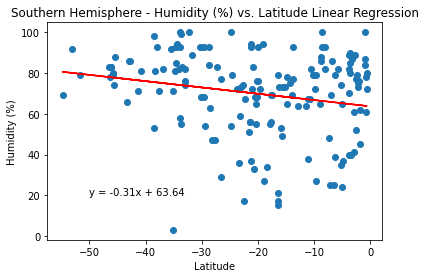

In [69]:
val2 = sh_df['Humidity']
val1 = sh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(-50, 20))
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0033129711710394817


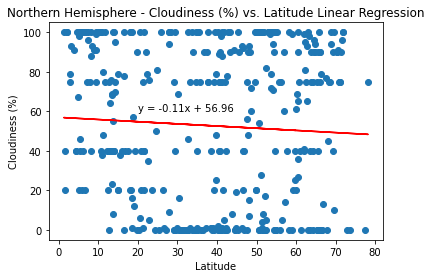

In [70]:
val2 = nh_df['Cloudiness']
val1 = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(20, 60))
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006340944514842022


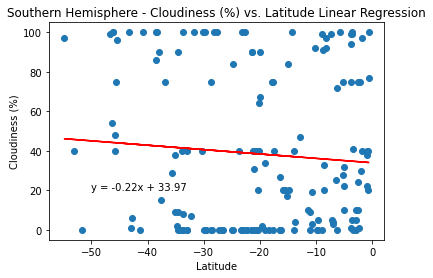

In [71]:
val2 = sh_df['Cloudiness']
val1 = sh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(-50, 20))
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0025289052199049997


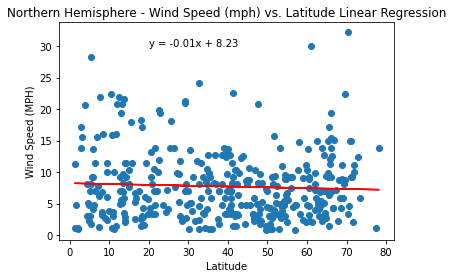

In [73]:
val2 = nh_df['Wind Speed']
val1 = nh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(20, 30))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03112525920728397


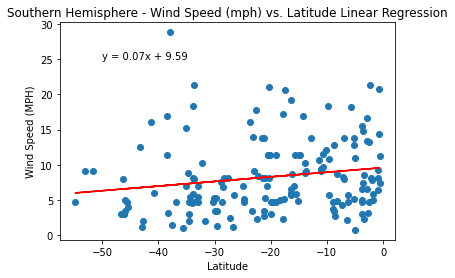

In [75]:
val2 = sh_df['Wind Speed']
val1 = sh_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(val1, val2)
regress =  val1 * slope + intercept
plt.scatter(val1, val2)
plt.plot(val1, regress,'r-')

correlation_matrix = np.corrcoef(val1, val2)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f"The r-squared is: {r_squared}")

plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.annotate(f"y = {round(slope, 2)}x + {round(intercept, 2)}", xy=(-50, 25))
plt.show()